### 3.2 Classification and regression with a two-layer perceptron

#### 3.2.1 Classification of linearly non-separable data

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Draw two sets of points/patterns in 2D from multivariate normal distribution
def generatePattern(n,shuffle=1, verbose=1, pattern=1):
    
   
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3

    class_A = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_A) +  mu_A[1]))
    class_B = np.concatenate((np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_B[0],np.multiply(np.random.normal(0,1,(1,n)),sigma_B) +  mu_A[1]))

    if shuffle:
        
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,2*n))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)
    
    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()
    
    
    
    if pattern:
        return patterns, targets
    else:
        return class_A, class_B
    

In [21]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.ones(W.shape)
    dv = np.ones(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
        
    weights1.append(W)
    weights2.append(V)
    
    return weights1, weights2,mse_errors,accuracys


In [22]:
def weights_init_MLP(n_in,n_out,scale,hidden):
    W = scale*np.random.randn(hidden,n_in)
    V = scale*np.random.randn(n_out,hidden+1)
    #print(W.shape)
    #W = np.append(W,scale*np.random.normal())
    #W = np.hstack((W,np.random.normal()))
    #print(W.shape)
    return W,V

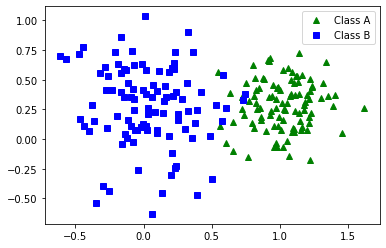

In [40]:
eta = 1e-4
n_in = np.shape(X)[0] 
n_out = 1
scale = 1e-2
hidden_perceptrons = [2,3,4,5,6,7,8]
epochs = 5000

X,T = generatePattern(100,verbose=1)

mse_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_holder = np.zeros((len(hidden_perceptrons),epochs))

for i,nPerceptron in enumerate(hidden_perceptrons):
    W,V = weights_init_MLP(n_in,n_out,scale,nPerceptron)
    W_train,V_train,mse,acc = backprop(eta,X,T,W,V,nPerceptron,epochs)
    mse_holder[i,:] = mse
    acc_holder[i,:] = acc

No handles with labels found to put in legend.


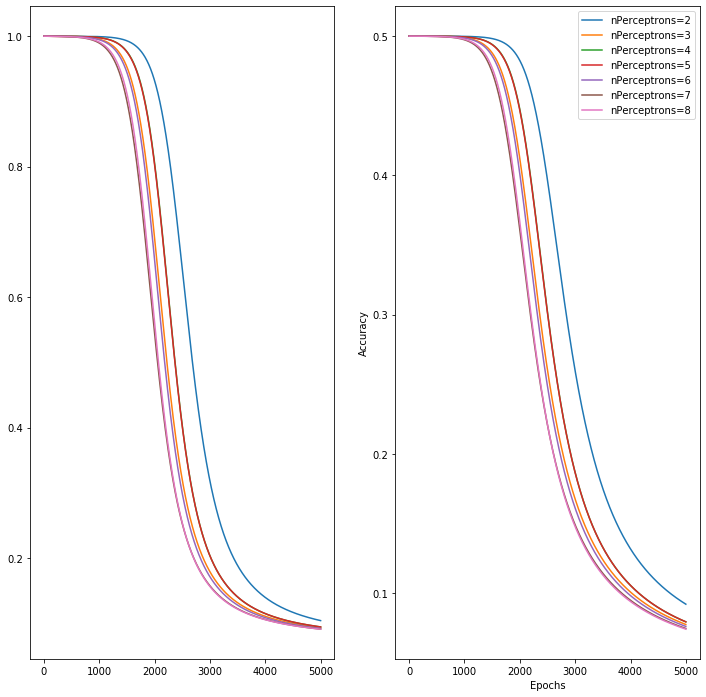

In [41]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for plots in range(len(mse_holder[:,1])):
    ax1.plot(np.linspace(0,epochs,epochs),mse_holder[plots,:], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
                 
    ax2.plot(np.linspace(0,epochs,epochs),acc_holder[plots,:], label='nPerceptrons=' + str(hidden_perceptrons[plots]))
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

plt.show()